In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pybaseball import statcast

In [3]:
dates = {2015: ['2015-04-05', '2015-10-04'],
        2016: ['2016-04-03', '2016-10-02'],
        2017: ['2017-04-02', '2017-10-01'],
        2018: ['2018-03-29', '2018-10-01'],
        2019: ['2019-03-28', '2019-09-29']}

In [84]:
# data19 = statcast(start_dt='2019-03-28', end_dt='2019-09-29')

In [85]:
# all_data = pd.DataFrame()
# for v in dates.values():
#     tmp = statcast(start_dt=v[0], end_dt=v[1])
#     all_data = pd.concat([all_data, tmp])

In [11]:
import pickle

In [33]:
all_data['def_team'] = all_data.apply(lambda r: r['home_team'] if r['inning_topbot'] == 'Top' else r['away_team'], axis=1)

In [41]:
deprecated = [col for col in all_data.columns if 'deprecated' in col]

In [43]:
all_data = all_data.drop(columns=deprecated)

In [44]:
all_data1516 = all_data[all_data['year'].isin([2015, 2016])]

In [46]:
all_data1718 = all_data[all_data['year'].isin([2017, 2018])]

In [47]:
all_data19 = all_data[all_data['year'] == 2019]

In [48]:
with open('statcast_1516.pkl', 'wb') as f1:
    pickle.dump(all_data1516, f1)

In [49]:
with open('statcast_1718.pkl', 'wb') as f2:
    pickle.dump(all_data1718, f2)

In [50]:
with open('statcast_19.pkl', 'wb') as f3:
    pickle.dump(all_data19, f3)

In [55]:
# del tmp
# del all_data
# del all_data1516
# del data19
# del all_data1718

In [76]:
all_data19

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,year,def_team
0,525,FC,2019-09-29,91.1,-2.1594,6.0822,Kelvin Herrera,641513.0,516969.0,strikeout,...,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard,2019,CWS
1,544,FC,2019-09-29,88.2,-2.2233,6.0711,Kelvin Herrera,641513.0,516969.0,NaN,...,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard,2019,CWS
2,559,FF,2019-09-29,95.8,-1.5517,6.4062,Kelvin Herrera,641513.0,516969.0,NaN,...,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard,2019,CWS
3,563,FC,2019-09-29,90.1,-2.1644,6.0060,Kelvin Herrera,641513.0,516969.0,NaN,...,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard,2019,CWS
4,588,FF,2019-09-29,98.2,-1.4739,6.2402,Kelvin Herrera,641513.0,516969.0,NaN,...,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard,2019,CWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731779,22479,CH,2019-03-28,88.0,-2.8687,4.9348,Luis Castillo,466320.0,622491.0,strikeout,...,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,2019,CIN
731780,22485,FF,2019-03-28,96.4,-2.7735,5.2440,Luis Castillo,466320.0,622491.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,2019,CIN
731781,22508,CH,2019-03-28,88.6,-2.8765,5.0955,Luis Castillo,466320.0,622491.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,2019,CIN
731782,22515,FF,2019-03-28,95.8,-2.7622,5.1903,Luis Castillo,466320.0,622491.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,2019,CIN


In [87]:
all_data19 = all_data19.sort_values(by=['game_date', 'game_pk', 'at_bat_number']).drop(columns='index').reset_index().drop(columns='index')

In [98]:
test_grp = all_data1718.groupby(['game_year', 'def_team'])['release_speed'].rolling(3).mean().reset_index().drop(columns='level_2')

In [100]:
test_grp[(test_grp['def_team'] == 'NYM') & (test_grp['game_year'] == 2018)]

,game_year,def_team,release_speed
1132756,2018.0,NYM,NaN
1132757,2018.0,NYM,NaN
1132758,2018.0,NYM,99.066667
1132759,2018.0,NYM,98.933333
1132760,2018.0,NYM,96.400000
...,...,...,...
1156765,2018.0,NYM,92.633333
1156766,2018.0,NYM,94.966667
1156767,2018.0,NYM,93.566667
1156768,2018.0,NYM,93.800000


In [121]:
all_data1718.type.unique()

array(['S', 'B', 'X'], dtype=object)

In [162]:
with open('statcast_1718.pkl', 'rb') as p:
    all_data1718 = pickle.load(p)

In [163]:
all_data1718

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,year,def_team
0,596,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,field_out,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,2017,TOR
1,604,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,595885.0,532077.0,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,2017,TOR
2,627,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,595885.0,532077.0,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,2017,TOR
3,637,CH,2017-10-01,82.8,-0.9901,6.0626,Roberto Osuna,595885.0,532077.0,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,2017,TOR
4,651,FT,2017-10-01,95.9,-0.8903,6.1341,Roberto Osuna,595885.0,532077.0,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,2017,TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721185,22907,FF,2018-03-29,94.1,-2.0053,6.4265,Chris Archer,434670.0,502042.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Strategic,2018,TB
721186,22927,CH,2018-03-29,87.9,-2.4264,6.2710,Chris Archer,643217.0,502042.0,field_out,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2018,TB
721187,22931,FF,2018-03-29,94.8,-2.3369,6.3277,Chris Archer,643217.0,502042.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2018,TB
721188,22952,FF,2018-03-29,93.9,-2.2895,6.4137,Chris Archer,643217.0,502042.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2018,TB


In [164]:
all_data1718 = all_data1718.sort_values(by=['game_date', 'game_pk', 'at_bat_number']).drop(columns='index').reset_index().drop(columns='index')

In [165]:
all_data1718

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,year,def_team
0,SL,2017-04-02,84.6,-1.2537,5.3882,Carlos Martinez,656941.0,593372.0,single,hit_into_play_no_out,...,0.0,0.0,0.0,0.0,0.0,0.0,Infield shift,Standard,2017,STL
1,FT,2017-04-02,97.3,-1.3152,5.1777,Carlos Martinez,656941.0,593372.0,NaN,ball,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2017,STL
2,FT,2017-04-02,95.9,-1.3091,5.4787,Carlos Martinez,656941.0,593372.0,NaN,foul,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2017,STL
3,FF,2017-04-02,94.9,-1.3276,5.5862,Carlos Martinez,656941.0,593372.0,NaN,ball,...,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,2017,STL
4,FF,2017-04-02,99.9,-1.0949,5.3388,Carlos Martinez,592178.0,593372.0,strikeout,swinging_strike,...,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,2017,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442428,FC,2018-10-01,92.6,-1.9600,6.2502,Kenley Jansen,435622.0,445276.0,NaN,called_strike,...,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard,2018,LAD
1442429,FC,2018-10-01,92.2,-1.9690,6.2644,Kenley Jansen,467827.0,445276.0,strikeout,swinging_strike,...,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard,2018,LAD
1442430,FC,2018-10-01,93.0,-1.7689,6.2976,Kenley Jansen,467827.0,445276.0,NaN,foul,...,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard,2018,LAD
1442431,FC,2018-10-01,91.6,-1.7451,6.2154,Kenley Jansen,467827.0,445276.0,NaN,called_strike,...,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard,2018,LAD


In [166]:
all_data1718 = all_data1718.drop(columns='year')

In [167]:
all_data1718 = all_data1718[all_data1718['type'] == 'X']

In [168]:
all_data1718 = all_data1718[(all_data1718['events'] != 'fielders_choice')&(all_data1718['events'] != 'field_error')]

In [169]:
hit_events = ['single', 'double', 'triple', 'home_run']

In [170]:
all_data1718['hit'] = all_data1718['events'].map(lambda x: 1 if x in hit_events else 0)

In [171]:
all_data1718 = all_data1718.reset_index().drop(columns='index')

In [217]:
test_grouped = all_data1718.groupby(['game_year', 'def_team'])['hit'].rolling(100).mean().reset_index()

In [240]:
import math

In [259]:
def spray_angle(r):
    try:
        return math.degrees(np.arctan((r['hc_x']-125.42) / (198.27-r['hc_y'])))
    except:
        return math.degrees(math.pi / 2)

In [260]:
all_data1718['spray_angle'] = all_data1718.apply(spray_angle, axis=1)

In [261]:
all_data1718['spray_angle']

0         77.293432
1         66.803760
2         21.497323
3         45.235186
4         48.384601
            ...    
250491   -40.503725
250492   -30.564824
250493   -31.946742
250494    16.909069
250495    42.075159
Name: spray_angle, Length: 250496, dtype: float64

In [262]:
feat1718 = all_data1718[['game_year', 'launch_speed', 'launch_angle', 'hit_distance_sc', 'spray_angle', 'home_team', 'def_team', 'hit']]

In [263]:
feat17 = feat1718[feat1718['game_year'] == 2017]

In [264]:
import seaborn as sns
sns.set_style('darkgrid')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


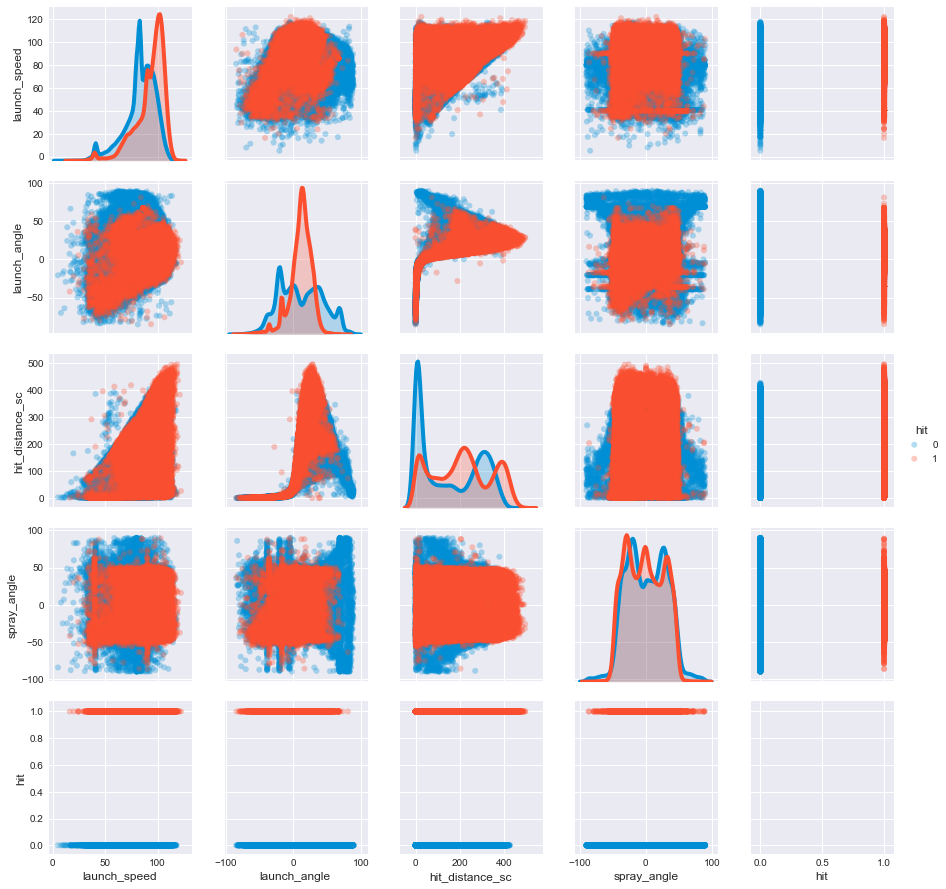

In [265]:
sns.pairplot(feat17[['launch_speed', 'launch_angle', 'hit_distance_sc', 'spray_angle', 'hit']], hue='hit', plot_kws=dict(alpha=.3, edgecolor='none'))

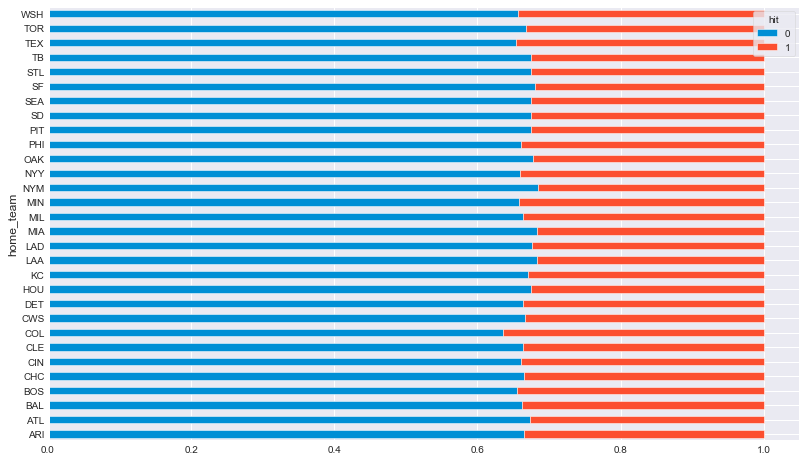

In [278]:
pd.crosstab(feat1718['home_team'], feat1718['hit'], normalize='index').plot.barh(stacked=True, figsize=(12,8))

In [281]:
pd.crosstab(feat1718['home_team'], feat1718['hit'], normalize='index')

hit,0,1
home_team,,
ARI,0.665320,0.334680
ATL,0.672738,0.327262
BAL,0.662114,0.337886
BOS,0.654921,0.345079
CHC,0.665460,0.334540
CIN,0.660847,0.339153
CLE,0.663221,0.336779
COL,0.635312,0.364688
CWS,0.665888,0.334112


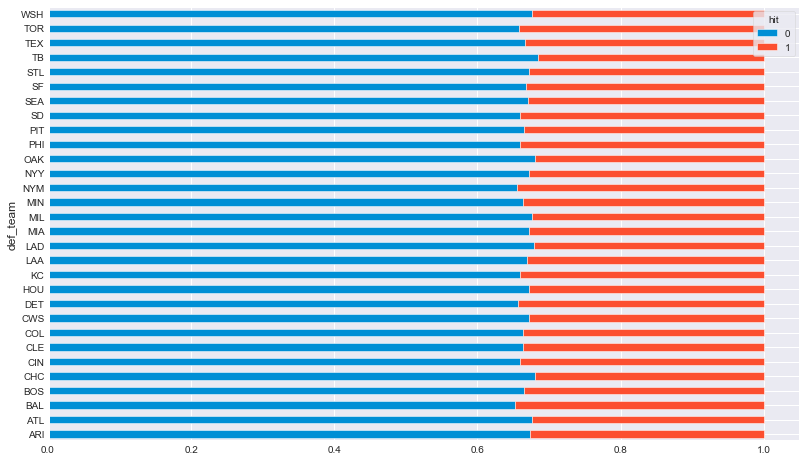

In [279]:
pd.crosstab(feat1718['def_team'], feat1718['hit'], normalize='index').plot.barh(stacked=True, figsize=(12,8))

In [280]:
pd.crosstab(feat1718['def_team'], feat1718['hit'], normalize='index')

hit,0,1
def_team,,
ARI,0.673637,0.326363
ATL,0.676146,0.323854
BAL,0.651981,0.348019
BOS,0.665089,0.334911
CHC,0.680406,0.319594
CIN,0.658874,0.341126
CLE,0.662930,0.337070
COL,0.663416,0.336584
CWS,0.671691,0.328309


In [674]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import confusion_matrix, roc_auc_score, fbeta_score, roc_curve, make_scorer, precision_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV

In [286]:
for col in feat17.dtypes[feat17.dtypes == 'object'].index:
    for_dummy = feat17.pop(col)
    feat17 = pd.concat([feat17, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [287]:
feat17.head()

,game_year,launch_speed,launch_angle,hit_distance_sc,spray_angle,hit,home_team_ARI,home_team_ATL,home_team_BAL,home_team_BOS,...,def_team_PHI,def_team_PIT,def_team_SD,def_team_SEA,def_team_SF,def_team_STL,def_team_TB,def_team_TEX,def_team_TOR,def_team_WSH
0,2017.0,96.1,18.3,256.0,77.293432,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2017.0,98.8,16.1,265.0,66.803760,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017.0,75.7,1.0,56.0,21.497323,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017.0,84.9,22.7,299.0,45.235186,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017.0,102.2,17.3,345.0,48.384601,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
print(feat17.shape)
feat17 = feat17.dropna()
print(feat17.shape)

(125883, 66)
(111752, 66)


In [430]:
X = feat17.drop(columns=['hit', 'game_year'])
y= feat17['hit']

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=np.random.seed(42))

## Random Forest

In [435]:
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=np.random.seed(42))

n_estimators = [300, 400]
max_features = [30]
max_depth = [15, 25]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [439]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 2)

In [440]:
grid_search

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400], 'max_features': [30], 'max_depth': [15, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [441]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=15, max_features=30, n_estimators=300 .................
[CV] max_depth=15, max_features=30, n_estimators=300 .................
[CV] max_depth=15, max_features=30, n_estimators=300 .................
[CV] max_depth=15, max_features=30, n_estimators=300 .................
[CV] max_depth=15, max_features=30, n_estimators=300 .................
[CV] max_depth=15, max_features=30, n_estimators=400 .................
[CV] max_depth=15, max_features=30, n_estimators=400 .................
[CV] max_depth=15, max_features=30, n_estimators=400 .................
[CV] .. max_depth=15, max_features=30, n_estimators=300, total= 3.2min
[CV] max_depth=15, max_features=30, n_estimators=400 .................
[CV] .. max_depth=15, max_features=30, n_estimators=300, total= 3.2min
[CV] max_depth=15, max_features=30, n_estimators=400 .................
[CV] .. max_depth=15, max_features=30, n_estimators=300, total= 3.2min
[CV] max_depth=25

[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  9.3min remaining:  2.3min


[CV] .. max_depth=25, max_features=30, n_estimators=400, total= 3.4min
[CV] .. max_depth=25, max_features=30, n_estimators=400, total= 3.4min
[CV] .. max_depth=25, max_features=30, n_estimators=400, total= 3.4min
[CV] .. max_depth=25, max_features=30, n_estimators=400, total= 3.3min


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400], 'max_features': [30], 'max_depth': [15, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [442]:
grid_search.best_params_

{'max_depth': 25, 'max_features': 30, 'n_estimators': 400}

In [443]:
grid_search.best_score_

0.9163513009340248

In [444]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=25, max_features=30,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

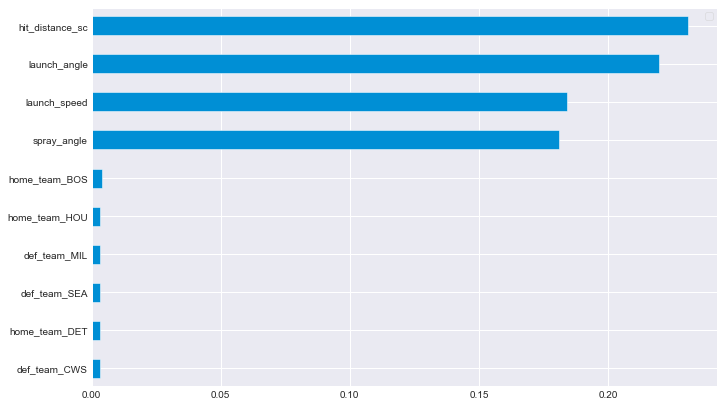

In [445]:
feat_imp = best_grid.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

In [446]:
y_pred = best_grid.predict(X_test)

In [447]:
roc_auc_score(y_test, y_pred)

0.831311852551885

In [449]:
fbeta_score(y_test, y_pred, 2)

0.7712023549713241

In [448]:
confusion_matrix(y_test, y_pred)

array([[12945,  1432],
       [ 1896,  6078]])

## AdaBoost

In [456]:
ada = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=30),random_state=np.random.seed(42))

ada_param_grid = {'n_estimators': [100, 200, 300],
               'learning_rate': [.01, .1, 1]}

In [457]:
ada_grid_search = GridSearchCV(estimator = ada, param_grid = ada_param_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 2)

In [458]:
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 1.1min
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 1.1min
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 1.1min
[CV] ............

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min


[CV] ................ learning_rate=1, n_estimators=100, total=  54.9s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=  55.0s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=  55.6s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .............. learning_rate=0.1, n_estimators=300, total= 2.9min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=  54.3s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=  53.9s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .............. learning_rate=0.1, n_estimators=300, total= 2.9min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [459]:
ada_grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [460]:
ada_grid_search.best_score_

0.9041735328283582

In [461]:
best_ada_grid = ada_grid_search.best_estimator_
best_ada_grid.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=None)

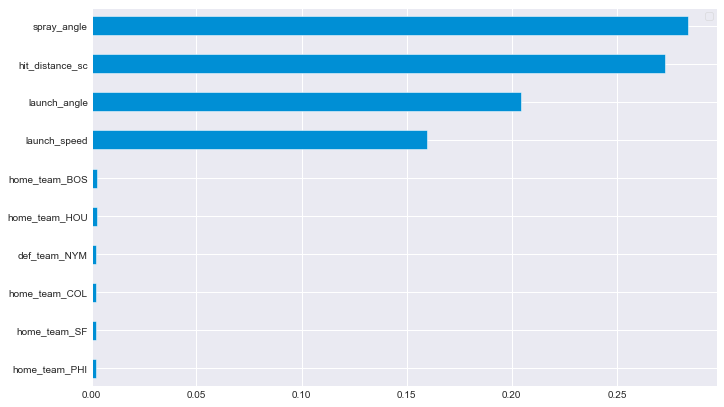

In [462]:
feat_imp = best_ada_grid.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

In [528]:
y_pred = best_ada_grid.predict(X_test)
print(roc_auc_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, 2))

0.8303908086270293
0.7923212468667015


In [529]:
confusion_matrix(y_test, y_pred)

array([[12365,  2012],
       [ 1589,  6385]])

## GradientBoosting

In [475]:
gb = GradientBoostingClassifier(max_depth=10, max_features= 30, random_state=np.random.seed(42))

gb_param_grid = {'n_estimators': [100, 200, 300],
               'learning_rate': [.01, .1, 1]}

In [476]:
gb_grid_search = GridSearchCV(estimator = gb, param_grid = gb_param_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 2)

In [478]:
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 6.0min
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 6.0min
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 6.1min
[CV] learning_rat

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 28.2min


[CV] ................ learning_rate=1, n_estimators=100, total= 2.5min
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total= 3.0min
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total= 3.0min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .............. learning_rate=0.1, n_estimators=300, total= 9.4min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total= 2.9min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total= 2.5min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] ................ learning_rate=1, n_estimators=200, total= 4.2min
[CV] learning_rate=1, n_estimators=200 ...............................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 42.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=30, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [479]:
gb_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [480]:
gb_grid_search.best_score_

0.9208780911246274

In [481]:
best_gb_grid = gb_grid_search.best_estimator_
best_gb_grid.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=30, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

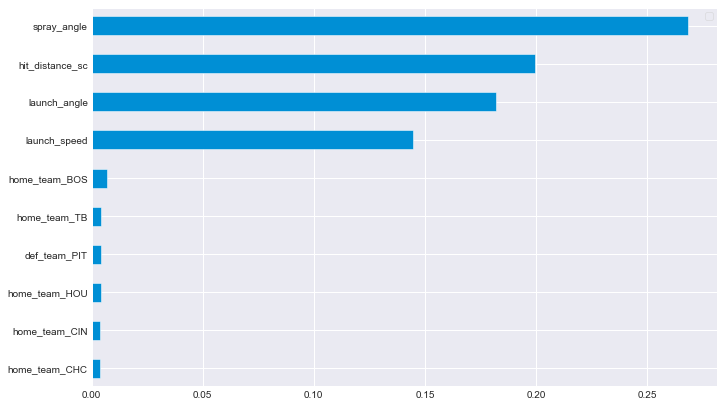

In [482]:
feat_imp = best_gb_grid.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

In [526]:
y_pred = best_gb_grid.predict(X_test)
print(roc_auc_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, 2))

0.8312582858887615
0.7628939828080229


In [527]:
confusion_matrix(y_test, y_pred)

array([[13149,  1228],
       [ 2010,  5964]])

## Logistic Regression (not using GridsearchCV atm b/c it seems to hang forever here)

In [490]:
from copy import copy, deepcopy

In [491]:
X

,launch_speed,launch_angle,hit_distance_sc,spray_angle,home_team_ARI,home_team_ATL,home_team_BAL,home_team_BOS,home_team_CHC,home_team_CIN,...,def_team_PHI,def_team_PIT,def_team_SD,def_team_SEA,def_team_SF,def_team_STL,def_team_TB,def_team_TEX,def_team_TOR,def_team_WSH
0,96.1,18.3,256.0,77.293432,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,98.8,16.1,265.0,66.803760,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,75.7,1.0,56.0,21.497323,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,84.9,22.7,299.0,45.235186,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102.2,17.3,345.0,48.384601,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125878,66.3,35.5,206.0,25.087700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125879,86.8,9.4,128.0,23.419580,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125880,95.1,28.8,322.0,-33.167774,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125881,82.6,-3.1,29.0,-17.433469,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [562]:
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()

In [563]:
scale = StandardScaler()
numeric = ['launch_angle', 'launch_speed', 'hit_distance_sc', 'spray_angle']
scale.fit(X_train_sc[numeric])
X_train_sc[numeric] = scale.transform(X_train_sc[numeric])
X_test_sc[numeric] = scale.transform(X_test_sc[numeric])

In [564]:
X_train_sc.head(10)

,launch_speed,launch_angle,hit_distance_sc,spray_angle,home_team_ARI,home_team_ATL,home_team_BAL,home_team_BOS,home_team_CHC,home_team_CIN,...,def_team_PHI,def_team_PIT,def_team_SD,def_team_SEA,def_team_SF,def_team_STL,def_team_TB,def_team_TEX,def_team_TOR,def_team_WSH
83081,0.328391,-1.143007,-1.202031,0.881850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16203,-0.065254,-0.887396,-1.209341,1.568085,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47621,0.228312,0.280545,0.866837,1.145387,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60630,0.575254,0.382790,1.290846,0.765820,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49796,0.174936,-0.596394,-1.106994,0.823929,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106562,0.048169,-0.360446,-0.756091,1.215039,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46248,0.174936,-0.399771,-0.880369,-1.113364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51072,-0.131974,-1.319968,-1.216652,-1.367912,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8608,0.828788,0.158639,1.371261,0.012946,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41517,0.201624,-1.174466,-1.194720,0.094052,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [565]:
X_train.head()

,launch_speed,launch_angle,hit_distance_sc,spray_angle,home_team_ARI,home_team_ATL,home_team_BAL,home_team_BOS,home_team_CHC,home_team_CIN,...,def_team_PHI,def_team_PIT,def_team_SD,def_team_SEA,def_team_SF,def_team_STL,def_team_TB,def_team_TEX,def_team_TOR,def_team_WSH
83081,92.5,-17.1,8.0,24.628646,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16203,86.6,-10.6,7.0,43.619509,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47621,91.0,19.1,291.0,31.921785,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60630,96.2,21.7,349.0,21.417650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49796,90.2,-3.2,21.0,23.025760,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [566]:
# lr_param_grid = {'penalty': ['l1', 'l2'],
#                 'C': [.1, 1, 5, 10, 100]}

In [567]:
# lr = LogisticRegression(class_weight='balanced', random_state=np.random.seed(42), solver='saga', n_jobs = -1)
# grid_search = GridSearchCV(estimator = lr, param_grid = lr_param_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 2)

In [568]:
# grid_search.fit(X_train, y_train)

In [569]:
best_score = 0
for c in np.logspace(-2, 2, 5):
    for pen in ['l1', 'l2']:
        lr = LogisticRegression(class_weight='balanced',
                                C=c, penalty=pen,
                                solver='saga',
                                n_jobs=-1,
                                random_state=np.random.seed(42))
        cv_result = cross_validate(lr,
                                   X=X_train_sc,
                                   y=y_train,
                                   scoring='roc_auc',
                                   cv=5, return_train_score=True)
        if np.mean(cv_result['test_score']) > best_score:
            best_score = np.mean(cv_result['test_score'])
            best_C, best_pen = c, pen
        print(f'Done with C = {str(c)} and penalty = {pen}')

Done with C = 0.01 and penalty = l1
Done with C = 0.01 and penalty = l2
Done with C = 0.1 and penalty = l1
Done with C = 0.1 and penalty = l2
Done with C = 1.0 and penalty = l1
Done with C = 1.0 and penalty = l2
Done with C = 10.0 and penalty = l1
Done with C = 10.0 and penalty = l2
Done with C = 100.0 and penalty = l1
Done with C = 100.0 and penalty = l2


In [570]:
best_C, best_pen

(0.01, 'l1')

In [571]:
best_score

0.7110590225207869

In [572]:
best_lr = LogisticRegression(class_weight='balanced', C=best_C, penalty=best_pen, random_state=np.random.seed(42), solver='saga', n_jobs = -1)

In [573]:
best_lr.fit(X_train_sc, y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

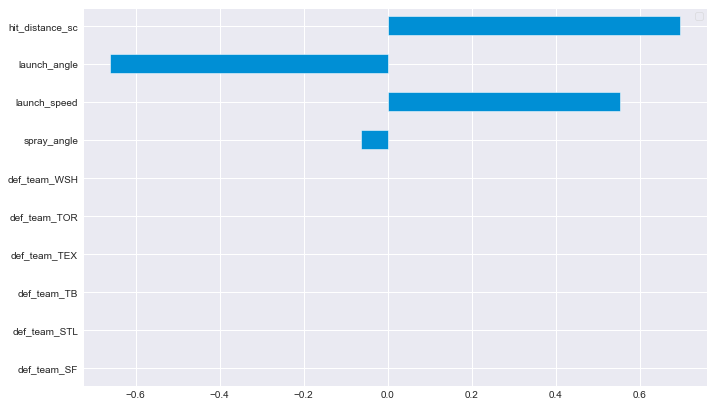

In [574]:
# b/c L1 was best basically all the categoricals are zero'd out
feat_imp = best_lr.coef_[0]
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

In [575]:
y_pred = best_lr.predict(X_test_sc)

In [576]:
roc_auc_score(y_test, y_pred)

0.6456503738701869

In [577]:
fbeta_score(y_test, y_pred, 2)

0.6229007633587786

In [578]:
confusion_matrix(y_test, y_pred)

array([[9002, 5375],
       [2670, 5304]])

## Model Comparison

In [579]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_grid.predict_proba(X_test)[:,1])
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, best_ada_grid.predict_proba(X_test)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, best_gb_grid.predict_proba(X_test)[:,1])
fpr_lr , tpr_lr, thresholds_lr = roc_curve(y_test, best_lr.predict_proba(X_test_sc)[:, 1])

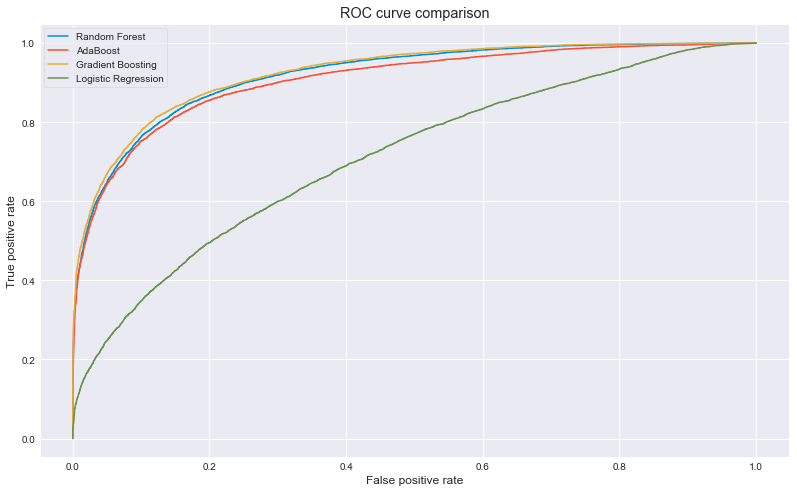

In [580]:
plt.figure(figsize=(12,8))
plt.plot(fpr_rf, tpr_rf, lw=1.5, label='Random Forest')
plt.plot(fpr_ada, tpr_ada ,lw=1.5, label='AdaBoost')
plt.plot(fpr_gb, tpr_gb, lw=1.5, label= 'Gradient Boosting')
plt.plot(fpr_lr, tpr_lr , lw=1.5, label='Logistic Regression')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
plt.legend();

## Iterate the hell out of GradientBoostingClassifier

### First with other hyperparameters

In [546]:
new_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=np.random.seed(42))

new_gb_param_grid = {'max_depth': [5, 10, 25, 100],
                    'max_features': [10, 20, 30, 50]}

In [552]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [553]:
new_gb_grid_search = GridSearchCV(estimator = new_gb, param_grid = new_gb_param_grid, scoring=ftwo_scorer, cv = 3, n_jobs = -1, verbose = 2)

In [554]:
new_gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=5, max_features=10 ....................................
[CV] max_depth=5, max_features=10 ....................................
[CV] max_depth=5, max_features=10 ....................................
[CV] max_depth=5, max_features=20 ....................................
[CV] max_depth=5, max_features=20 ....................................
[CV] max_depth=5, max_features=20 ....................................
[CV] max_depth=5, max_features=30 ....................................
[CV] max_depth=5, max_features=30 ....................................
[CV] ..................... max_depth=5, max_features=10, total=  13.9s
[CV] max_depth=5, max_features=30 ....................................
[CV] ..................... max_depth=5, max_features=10, total=  13.9s
[CV] max_depth=5, max_features=50 ....................................
[CV] ..................... max_depth=5, max_features=10, total=  14.0s
[CV] max_depth=5

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.4min


[CV] .................... max_depth=25, max_features=10, total=17.9min
[CV] max_depth=25, max_features=50 ...................................
[CV] .................... max_depth=25, max_features=10, total=17.5min
[CV] max_depth=25, max_features=50 ...................................
[CV] .................... max_depth=25, max_features=20, total=30.6min
[CV] max_depth=25, max_features=50 ...................................
[CV] .................... max_depth=25, max_features=20, total=30.7min
[CV] max_depth=100, max_features=10 ..................................
[CV] .................... max_depth=25, max_features=20, total=31.3min
[CV] max_depth=100, max_features=10 ..................................
[CV] .................... max_depth=25, max_features=30, total=40.9min
[CV] max_depth=100, max_features=10 ..................................
[CV] .................... max_depth=25, max_features=30, total=40.5min
[CV] max_depth=100, max_features=20 ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 100.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 10, 25, 100], 'max_features': [10, 20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [606]:
new_gb_grid_search.best_params_

{'max_depth': 10, 'max_features': 50}

In [607]:
new_gb_grid_search.best_score_

0.762217809910988

In [611]:
new_gb_best = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate=0.1,
                                         max_features=new_gb_grid_search.best_params_['max_features'],
                                         max_depth = new_gb_grid_search.best_params_['max_depth'],
                                         random_state=np.random.seed(42))

In [612]:
new_gb_best.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [613]:
y_pred = new_gb_best.predict(X_test)

In [614]:
confusion_matrix(y_test, y_pred)

array([[13109,  1268],
       [ 1986,  5988]])

In [615]:
fbeta_score(y_test, y_pred, beta=2)

0.7647118921127912

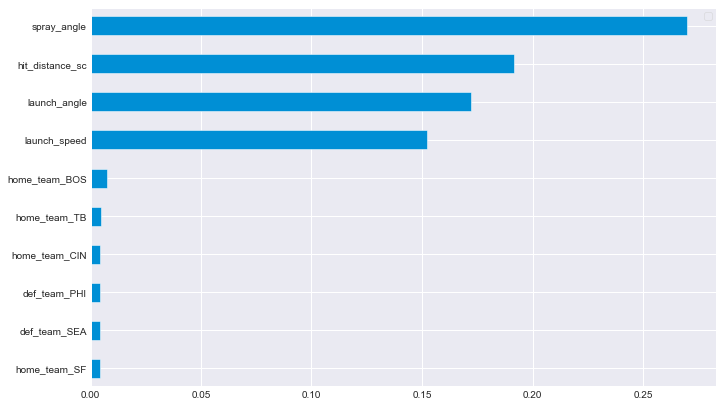

In [623]:
feat_imp = new_gb_best.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

## One trial with SMOTE to see if it's any better (need to work on including in training/cross-val)

In [616]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [617]:
sm = SMOTE(random_state=np.random.seed(42))
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [618]:
Counter(y_train_smote)

Counter({0: 57504, 1: 57504})

In [619]:
new_gb_best_smote = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate=0.1,
                                         max_features=new_gb_grid_search.best_params_['max_features'],
                                         max_depth = new_gb_grid_search.best_params_['max_depth'],
                                         random_state=np.random.seed(42))
new_gb_best_smote.fit(X_train_smote, y_train_smote.ravel()) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [620]:
y_pred = new_gb_best_smote.predict(X_test)

In [621]:
confusion_matrix(y_test, y_pred)

array([[12903,  1474],
       [ 1841,  6133]])

In [622]:
fbeta_score(y_test, y_pred, beta=2) # it's a little better

0.7762701566969598

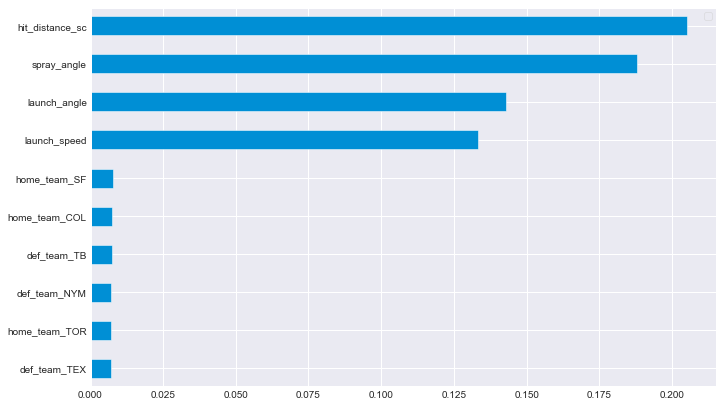

In [624]:
feat_imp = new_gb_best_smote.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);

## Threshold Tuning (need to work on using this in training/cross-val)

In [634]:
thresh = np.linspace(.05, .95, .500)

In [654]:
fbetas = {}
for thr in thresh:
    y_pred = [1 if y >= thr else 0 for y in new_gb_best_smote.predict_proba(X_test)[:,1]]
    fbetas[thr] = fbeta_score(y_test, y_pred, 2)
    print(f'Done with threshold = {str(thr)}')

Done with threshold = 0.05
Done with threshold = 0.05180360721442886
Done with threshold = 0.05360721442885772
Done with threshold = 0.055410821643286576
Done with threshold = 0.05721442885771543
Done with threshold = 0.059018036072144286
Done with threshold = 0.06082164328657315
Done with threshold = 0.06262525050100201
Done with threshold = 0.06442885771543086
Done with threshold = 0.06623246492985972
Done with threshold = 0.06803607214428858
Done with threshold = 0.06983967935871743
Done with threshold = 0.0716432865731463
Done with threshold = 0.07344689378757516
Done with threshold = 0.075250501002004
Done with threshold = 0.07705410821643287
Done with threshold = 0.07885771543086173
Done with threshold = 0.08066132264529058
Done with threshold = 0.08246492985971944
Done with threshold = 0.0842685370741483
Done with threshold = 0.08607214428857715
Done with threshold = 0.08787575150300601
Done with threshold = 0.08967935871743488
Done with threshold = 0.09148296593186372
Done with

Done with threshold = 0.40711422845691375
Done with threshold = 0.40891783567134266
Done with threshold = 0.4107214428857715
Done with threshold = 0.41252505010020035
Done with threshold = 0.4143286573146292
Done with threshold = 0.41613226452905805
Done with threshold = 0.4179358717434869
Done with threshold = 0.4197394789579158
Done with threshold = 0.42154308617234465
Done with threshold = 0.4233466933867735
Done with threshold = 0.42515030060120235
Done with threshold = 0.4269539078156312
Done with threshold = 0.42875751503006004
Done with threshold = 0.43056112224448895
Done with threshold = 0.4323647294589178
Done with threshold = 0.43416833667334664
Done with threshold = 0.4359719438877755
Done with threshold = 0.43777555110220434
Done with threshold = 0.4395791583166332
Done with threshold = 0.4413827655310621
Done with threshold = 0.44318637274549094
Done with threshold = 0.4449899799599198
Done with threshold = 0.44679358717434864
Done with threshold = 0.4485971943887775
Done

Done with threshold = 0.7678356713426854
Done with threshold = 0.7696392785571142
Done with threshold = 0.7714428857715431
Done with threshold = 0.7732464929859719
Done with threshold = 0.7750501002004008
Done with threshold = 0.7768537074148296
Done with threshold = 0.7786573146292585
Done with threshold = 0.7804609218436873
Done with threshold = 0.7822645290581162
Done with threshold = 0.784068136272545
Done with threshold = 0.7858717434869739
Done with threshold = 0.7876753507014028
Done with threshold = 0.7894789579158317
Done with threshold = 0.7912825651302605
Done with threshold = 0.7930861723446894
Done with threshold = 0.7948897795591182
Done with threshold = 0.7966933867735471
Done with threshold = 0.7984969939879759
Done with threshold = 0.8003006012024048
Done with threshold = 0.8021042084168336
Done with threshold = 0.8039078156312625
Done with threshold = 0.8057114228456913
Done with threshold = 0.8075150300601202
Done with threshold = 0.8093186372745491
Done with thresho

In [655]:
max(fbetas, key=fbetas.get)

0.1654308617234469

In [656]:
fbetas

{0.05: 0.7966081211730583,
 0.05180360721442886: 0.7978680449002665,
 0.05360721442885772: 0.7990733621980336,
 0.055410821643286576: 0.8002067665362551,
 0.05721442885771543: 0.8016864776998882,
 0.059018036072144286: 0.8031948491208054,
 0.06082164328657315: 0.8047245381723066,
 0.06262525050100201: 0.8061111566521846,
 0.06442885771543086: 0.807538256136387,
 0.06623246492985972: 0.8093825329130355,
 0.06803607214428858: 0.8106907452941298,
 0.06983967935871743: 0.8119923752693519,
 0.0716432865731463: 0.8129439621152329,
 0.07344689378757516: 0.8144353512005164,
 0.075250501002004: 0.8158834213657906,
 0.07705410821643287: 0.8169161519941379,
 0.07885771543086173: 0.818723886707678,
 0.08066132264529058: 0.8201431277625763,
 0.08246492985971944: 0.8213788447744821,
 0.0842685370741483: 0.8226161265758525,
 0.08607214428857715: 0.8236678611564641,
 0.08787575150300601: 0.824990966864333,
 0.08967935871743488: 0.8257154424769332,
 0.09148296593186372: 0.8264639302951352,
 0.093286573

## Go back and fit on the entire 2017 data and evaluate on 2018

In [659]:
new_gb_best_smote.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [660]:
feat18 = feat1718[feat1718['game_year']==2018]

In [661]:
feat18

,game_year,launch_speed,launch_angle,hit_distance_sc,spray_angle,home_team,def_team,hit
125883,2018.0,104.5,31.9,406.0,-7.542985,TB,TB,0
125884,2018.0,71.5,-31.8,4.0,28.672668,TB,TB,0
125885,2018.0,80.0,69.0,NaN,-20.821063,TB,BOS,0
125886,2018.0,104.8,19.5,365.0,-27.909768,TB,TB,1
125887,2018.0,77.1,-11.9,14.0,-23.506629,TB,TB,0
...,...,...,...,...,...,...,...,...
250491,2018.0,65.7,-15.5,8.0,-40.503725,LAD,COL,0
250492,2018.0,81.0,-11.4,11.0,-30.564824,LAD,COL,0
250493,2018.0,107.1,23.4,414.0,-31.946742,LAD,LAD,1
250494,2018.0,104.7,23.6,409.0,16.909069,LAD,LAD,1


In [662]:
for col in feat18.dtypes[feat18.dtypes == 'object'].index:
    for_dummy = feat18.pop(col)
    feat18 = pd.concat([feat18, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [666]:
print(feat18.shape)
feat18 = feat18.dropna()
print(feat18.shape)

(124613, 66)
(113460, 66)


In [667]:
X_h = feat18.drop(columns=['game_year', 'hit'])
y_h = feat18['hit']

In [670]:
y_pred = [1 if y >= max(fbetas, key=fbetas.get) else 0 for y in new_gb_best_smote.predict_proba(X_h)[:,1]]

In [671]:
confusion_matrix(y_h, y_pred)

array([[52164, 21746],
       [ 3658, 35892]])

In [672]:
fbeta_score(y_h, y_pred, 2)

0.831456926027854

In [675]:
precision_score(y_h, y_pred)

0.6227141816162948

In [676]:
recall_score(y_h, y_pred)

0.9075094816687737

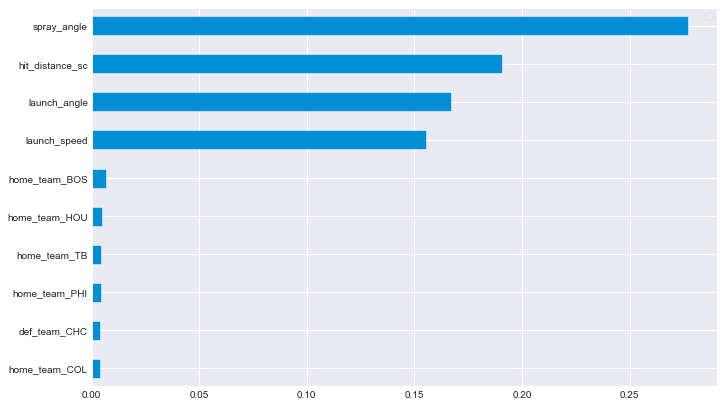

In [677]:
feat_imp = new_gb_best_smote.feature_importances_
features = X.columns.values
zipped = zip(features, feat_imp)
feat_imp_sort = sorted(list(zipped), key=lambda tup: abs(tup[1]))[-10:]

feat_imp_df = pd.DataFrame.from_records(feat_imp_sort)
feat_imp_df.plot.barh(figsize=(10,7))
plt.legend([])
plt.yticks(range(0, len(feat_imp_df)), feat_imp_df[0]);